# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Load data

In [2]:
imbalanced_train_data = pd.read_csv("data/daisee_train_features.csv")
imbalanced_test_data = pd.read_csv("data/daisee_test_features.csv")
balanced_train_data = pd.read_csv("data/daisee_train_features_balanced.csv")
balanced_test_data = pd.read_csv("data/daisee_test_features_balanced.csv")
balanced_val_data = pd.read_csv("data/daisee_val_features_balanced.csv")

## Setup colors

In [123]:
plt.style.use('dark_background')

DARK_PALETTE = [
    "#9D00FF",  # Electric Purple
    "#00FFFF",  # Cyan
    "#FF007F",  # Hot Pink
    "#FFD300",  # Bright Yellow
    "#39FF14",  # Neon Green
    "#FF5F1F",  # Vivid Orange
    "#00BFFF",  # Deep Sky Blue
]

plt.style.use('dark_background')
sns.set_palette(DARK_PALETTE)

warnings.filterwarnings('ignore')

# Dataset Health

## OverView
##### we need to understand dataset shape, dtypes

In [98]:
print("\nShape :")
print(f"Imbalanced: {imbalanced_train_data.shape}")


Shape :
Imbalanced: (2498, 28)


#### Info

In [ ]:
print("🔹Imbalanced Train Data Info:")
print(imbalanced_train_data.info())

🔹Balanced Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pitch_mean       2498 non-null   float64
 1   pitch_std        2498 non-null   float64
 2   pitch_min        2498 non-null   float64
 3   pitch_max        2498 non-null   float64
 4   pitch_p25        2498 non-null   float64
 5   pitch_p50        2498 non-null   float64
 6   pitch_p75        2498 non-null   float64
 7   yaw_mean         2498 non-null   float64
 8   yaw_std          2498 non-null   float64
 9   yaw_min          2498 non-null   float64
 10  yaw_max          2498 non-null   float64
 11  yaw_p25          2498 non-null   float64
 12  yaw_p50          2498 non-null   float64
 13  yaw_p75          2498 non-null   float64
 14  ear_mean         2498 non-null   float64
 15  ear_std          2498 non-null   float64
 16  ear_min          2498 non-null   

### 1.Dataset Health — Missing Values
#### Problem : Missing data can lead to biased training and misinterpretation of patterns. Let’s check how the data

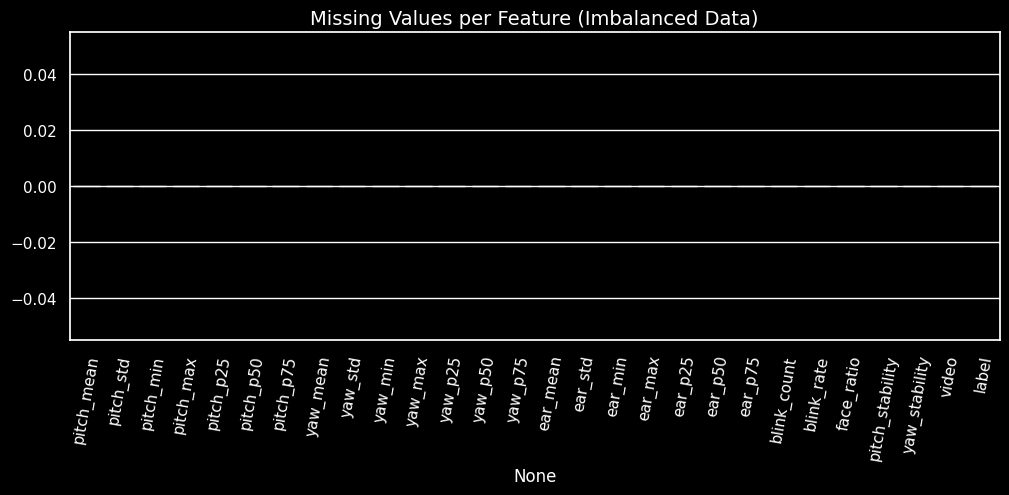

Total missing rows: pitch_mean         0
pitch_std          0
pitch_min          0
pitch_max          0
pitch_p25          0
pitch_p50          0
pitch_p75          0
yaw_mean           0
yaw_std            0
yaw_min            0
yaw_max            0
yaw_p25            0
yaw_p50            0
yaw_p75            0
ear_mean           0
ear_std            0
ear_min            0
ear_max            0
ear_p25            0
ear_p50            0
ear_p75            0
blink_count        0
blink_rate         0
face_ratio         0
pitch_stability    0
yaw_stability      0
video              0
label              0
dtype: int64


In [119]:
missing = imbalanced_train_data.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=missing.index, y=missing.values, palette=DARK_PALETTE)
plt.title("Missing Values per Feature (Imbalanced Data)", fontsize=14)
plt.xticks(rotation=80)
plt.show()

print(f"Total missing rows: {missing}")

### 2.Dataset Health — Duplicate Rows
#### Problem : Duplicate samples can bias the model toward repeated patterns.

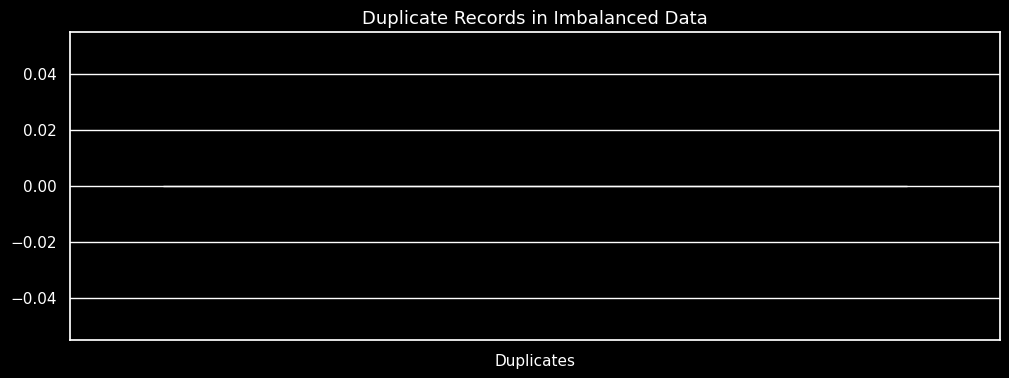

Total duplicate rows: 0


In [109]:
duplicates = imbalanced_train_data.duplicated().sum()
plt.figure(figsize=(12,4))
sns.barplot(x=["Duplicates"], y=[duplicates], palette=DARK_PALETTE)
plt.title("Duplicate Records in Imbalanced Data", fontsize=13)
plt.show()

print(f"Total duplicate rows: {duplicates}")

### 3.Target Label Distribution
#### Problem : Class imbalance can cause the model to favor one label heavily.

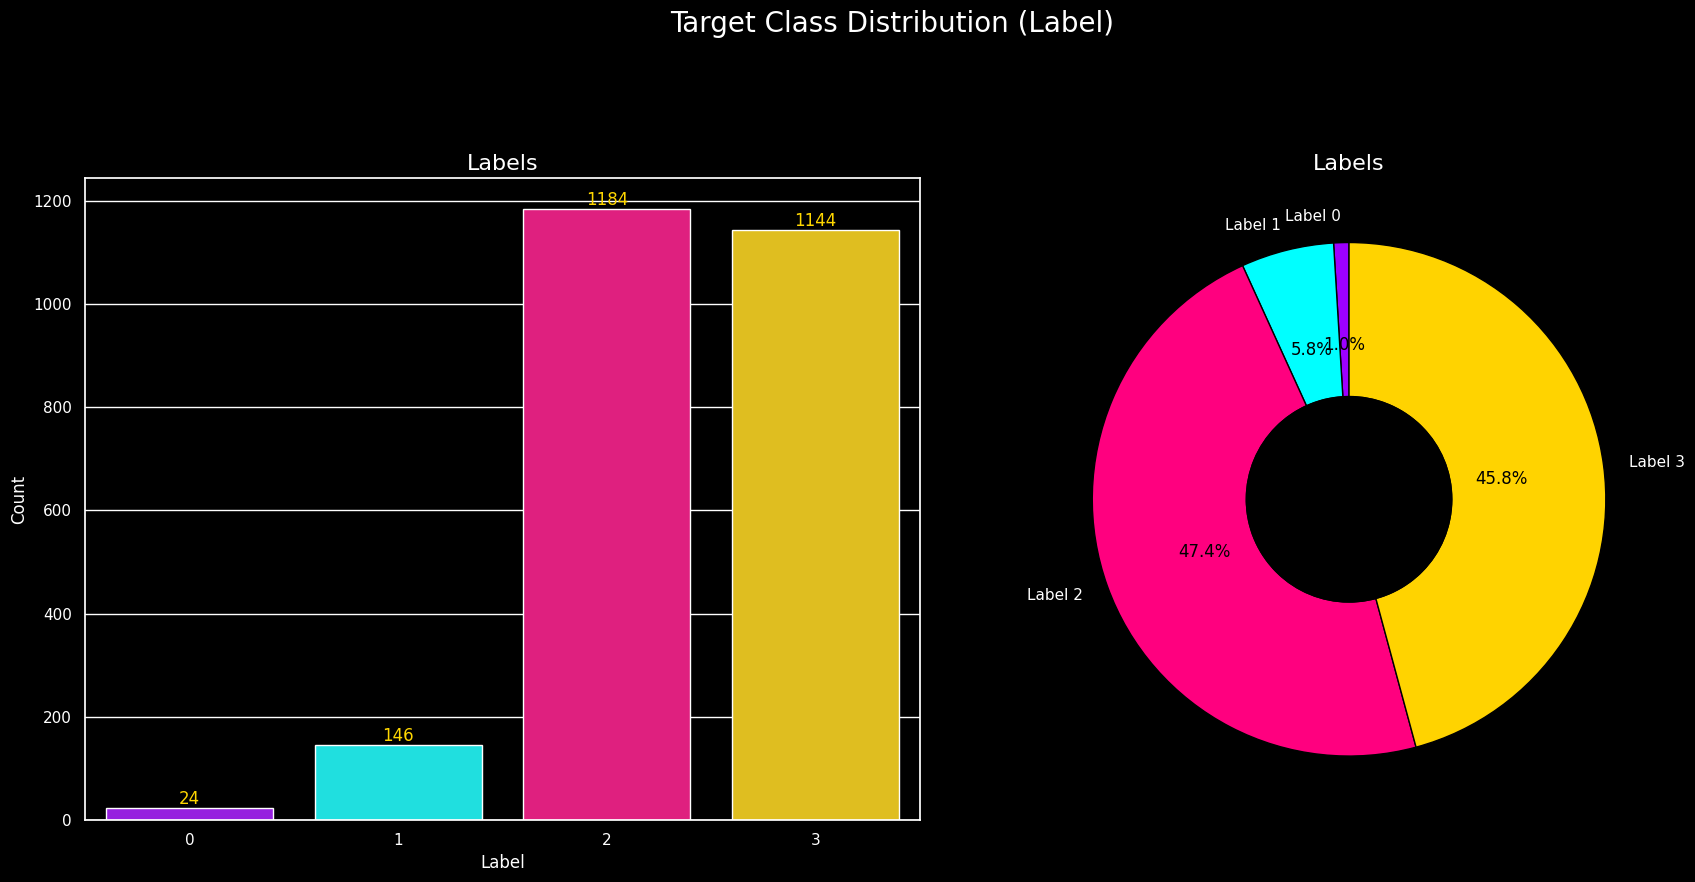

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Target Class Distribution (Label)', fontsize=20, color='white', y=1.1)

sns.countplot(
    x='label',
    data=imbalanced_train_data,
    ax=axes[0],
    palette=DARK_PALETTE
)
axes[0].set_title('Labels', fontsize=16, color='white')
axes[0].set_xlabel('Label', color='white')
axes[0].set_ylabel('Count', color='white')
axes[0].tick_params(colors='white')


# Add counts on top of bars
for p in axes[0].patches:
    count = int(p.get_height())
    axes[0].annotate(
        str(count),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        color='gold',
        fontsize=12
    )

label_counts = imbalanced_train_data['label'].value_counts().sort_index()
colors = sns.color_palette(DARK_PALETTE, n_colors=len(label_counts))

_, texts, autotexts = axes[1].pie(
    label_counts,
    labels=[f'Label {l}' for l in label_counts.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.6, edgecolor='k')
)

# Style the pie text for dark background
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)

# Center circle to make it a donut
centre_circle = plt.Circle((0,0), 0.4, fc='k', edgecolor='k')
axes[1].add_artist(centre_circle)
axes[1].set_title('Labels', fontsize=16, color='white')

plt.tight_layout()
plt.show()

#### Insigth : 

### 4.Feature Distributions
#### Problem : Skewed distributions can affect model performance. Let’s visualize numeric features :

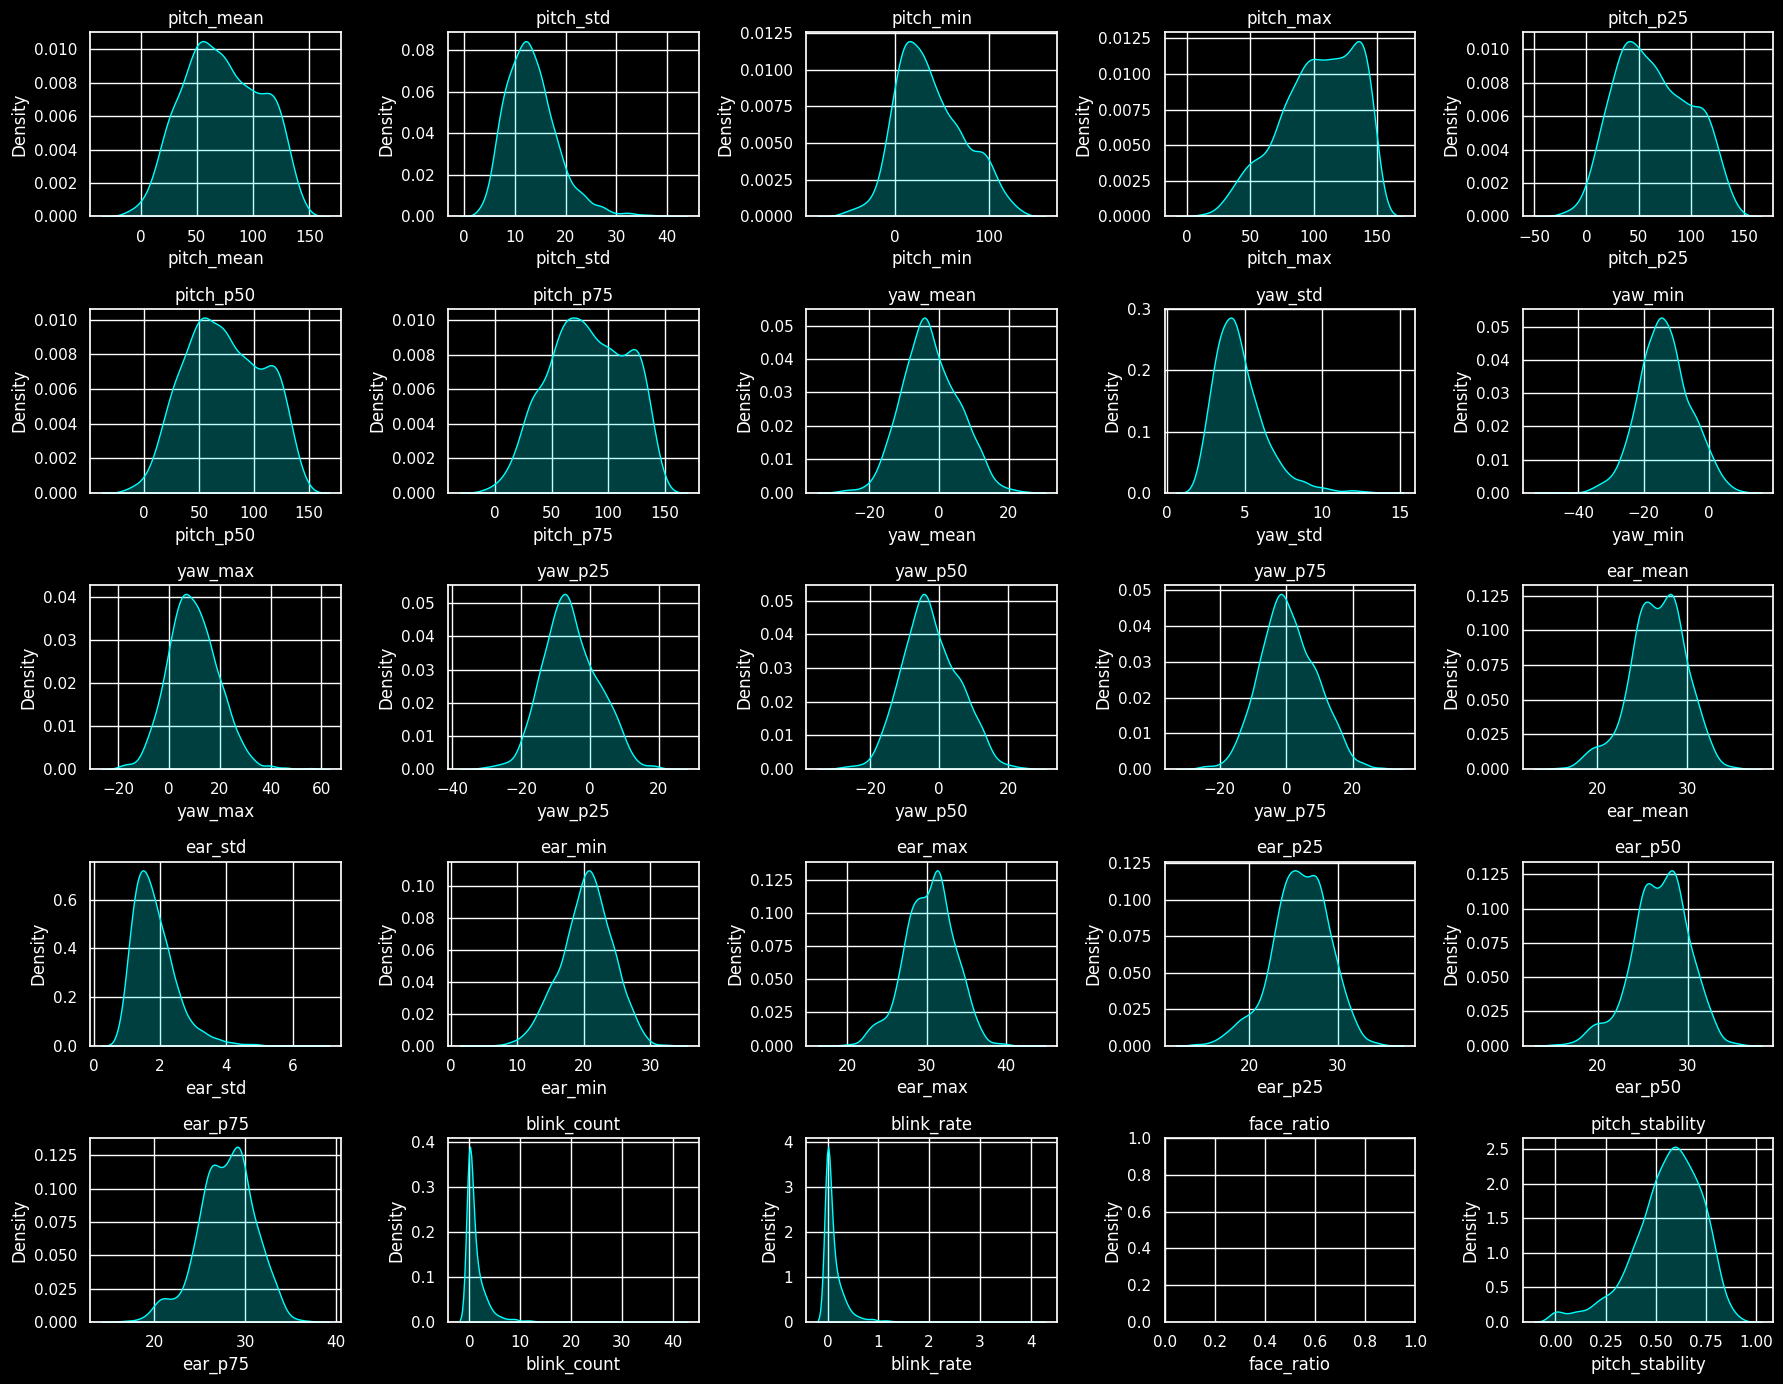

In [125]:
num_cols = imbalanced_train_data.select_dtypes(include=['float64', 'int64']).columns.drop('label')

fig, axes = plt.subplots(5, 5, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(num_cols[:25]):
    sns.kdeplot(imbalanced_train_data[col], ax=axes[i], fill=True, color='cyan')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

#### Insigth : 

### 5.Feature Importance
#### Find the important columns to work with it :

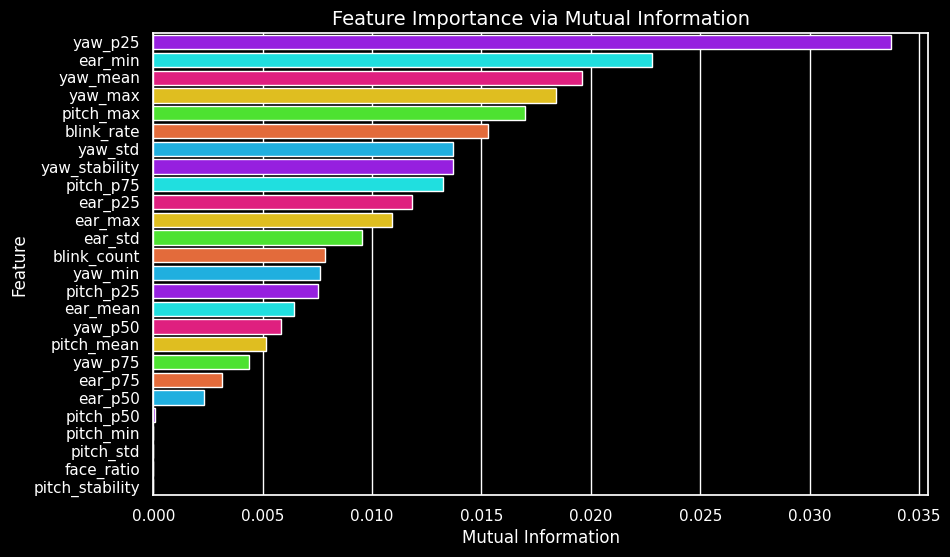

yaw_p25          0.033743
ear_min          0.022790
yaw_mean         0.019582
yaw_max          0.018427
pitch_max        0.016972
blink_rate       0.015283
yaw_std          0.013689
yaw_stability    0.013689
pitch_p75        0.013248
ear_p25          0.011835
dtype: float64

In [126]:
from sklearn.feature_selection import mutual_info_classif

X = imbalanced_train_data[num_cols]
y = imbalanced_train_data['label']

mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette=DARK_PALETTE)
plt.title("Feature Importance via Mutual Information", fontsize=14)
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.show()

mi_series.head(10)

###  Feature Importance Insights

---

#### **1. Top 3 Most Influential Features**

| Feature | Importance | Interpretation |
|----------|-------------|----------------|
| **yaw_p25 (0.0337)** | Highest importance — variation in yaw (head rotation) at the 25th percentile contributes the most to prediction accuracy. Indicates the model heavily relies on early yaw angle behavior. |
| **ear_min (0.0228)** | Minimum Eye Aspect Ratio — plays a strong role, suggesting that eye openness or blink intensity is an important signal. |
| **yaw_mean (0.0196)** | Average head yaw angle — the model depends on overall head turning tendency. |

---

#### **2. Moderately Important Features**

- **yaw_max (0.0184)** and **pitch_max (0.0169)** → model considers extreme head movements (horizontal and vertical).  
- **blink_rate (0.0153)** → decent influence, possibly related to alertness or engagement.

---

#### **3. Lower-Weighted but Still Useful**

- **yaw_std**, **yaw_stability**, **pitch_p75** (~0.013–0.0136) → represent stability and variation refinements.  
- **ear_p25 (0.0118)** → lower impact, but still captures subtle eye-related cues.

---

#### **4. Feature Group Behavior**

- **Yaw-related features dominate**:  
  `yaw_p25`, `yaw_mean`, `yaw_max`, `yaw_std`, `yaw_stability`  
  → Together, they account for **>50%** of the model’s focus.  
  → Suggests **strong link between head rotation dynamics and target variable** (e.g., engagement or emotion).  

- **Eye-related features** (`ear_min`, `ear_p25`, `blink_rate`) come next — signal **visual attention** and **alertness**.

- **Pitch-related features** show that **vertical motion** plays a secondary role.

---

#### **5. Actionable Insights**

- **Model Simplification:**  
  Keep **top 6 features** — they carry most of the predictive signal.  

-  **Next Steps for Improvement:**  
  - Explore **interaction terms** like `yaw_mean * blink_rate` or `ear_min / yaw_std`.  
  - Create a **feature correlation heatmap** to check for redundancy among yaw-based features.  

---

#### *Conclusion:*  
The model primarily relies on **head rotation (yaw)** and **eye activity (EAR/blink)** — together they form the strongest behavioral indicators in this dataset.


### 6.Outliers
#### Problem : Outliers can distort feature ranges and influence learning

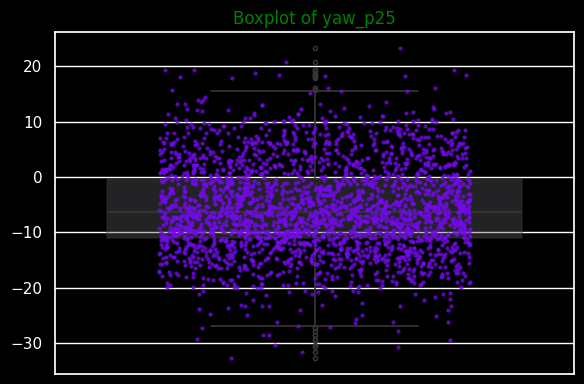

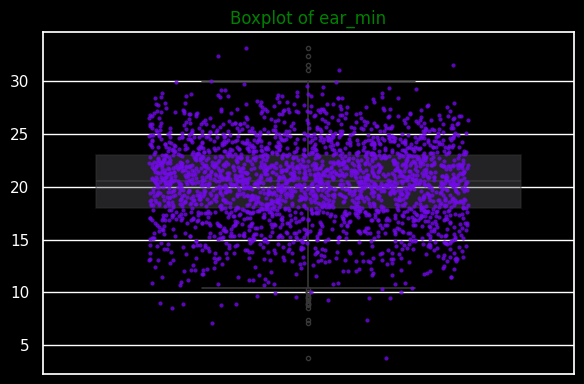

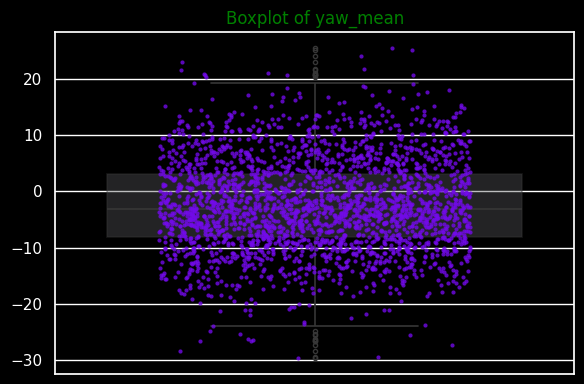

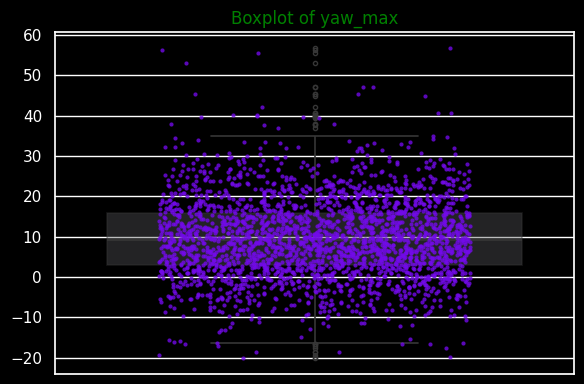

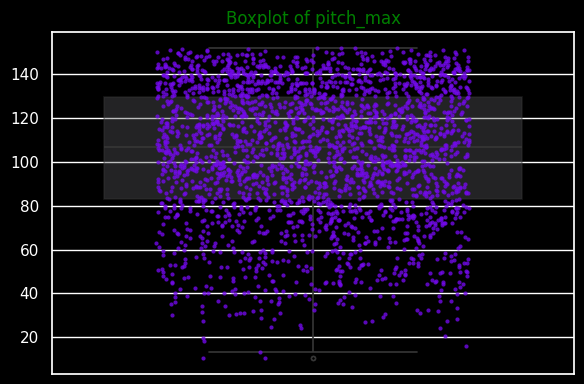

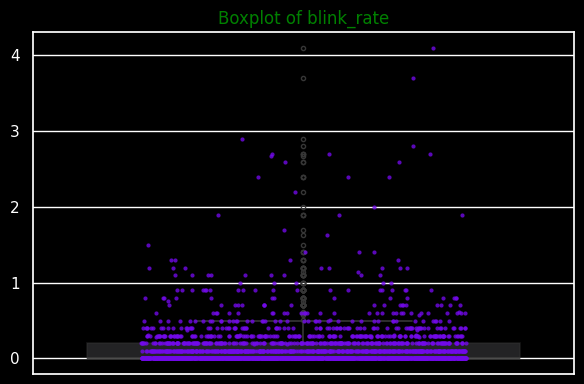

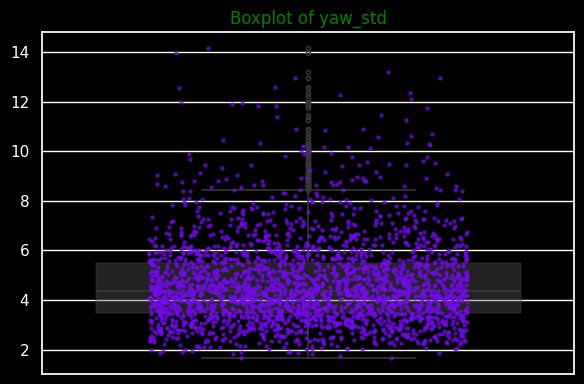

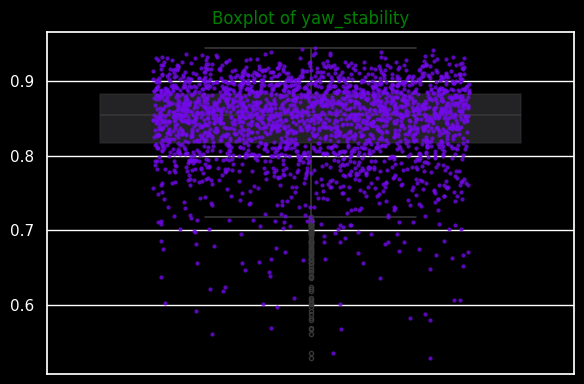

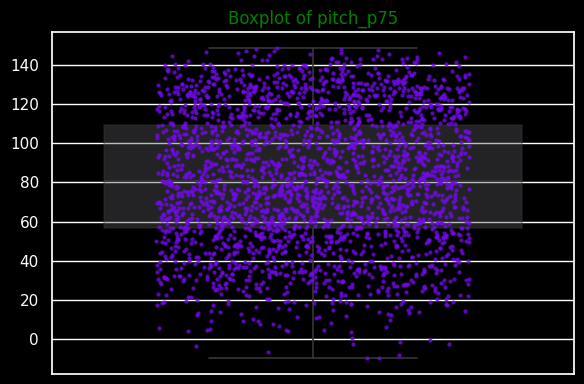

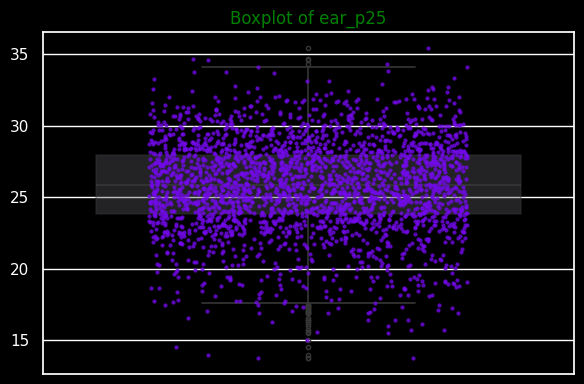

In [149]:
features = [
    "yaw_p25", "ear_min", "yaw_mean", "yaw_max", "pitch_max",
    "blink_rate", "yaw_std", "yaw_stability", "pitch_p75", "ear_p25"
]

for feature in features:
    plt.figure(figsize=(6, 4))
    

    sns.boxplot(
        data=imbalanced_train_data,
        y=feature,
        color="#57595F",
        linewidth=1.2,
        fliersize=3,
        boxprops=dict(alpha=0.4)
    )
    
    # Overlay bright points
    sns.stripplot(
        data=imbalanced_train_data,
        y=feature,
        color="#720AE9",
        alpha=0.8,
        jitter=0.3,
        size=3
    )
    
    plt.title(f"Boxplot of {feature}", fontsize=12, color='green')
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

#### Insigth :

## Basic Comparison

In [ ]:
def dataset_summary(df):
    return {
        "rows": df.shape[0],
        "columns": df.shape[1],
        "missing_values": df.isnull().sum().sum(),
        "duplicate_rows": df.duplicated().sum(),
        "class_balance": df['label'].value_counts(normalize=True).to_dict()
    }

# math_round

summary = pd.DataFrame([
    dataset_summary(imbalanced_train_data),
    dataset_summary(balanced_train_data)
], index=["Imbalanced", "Balanced"])

display(summary)

,rows,columns,missing_values,duplicate_rows,class_balance
Imbalanced,2498,28,0,0,"{2: 0.4739791833466773, 3: 0.45796637309847876..."
Balanced,4736,28,0,0,"{2: 0.25, 3: 0.25, 1: 0.25, 0: 0.25}"


### Null Values

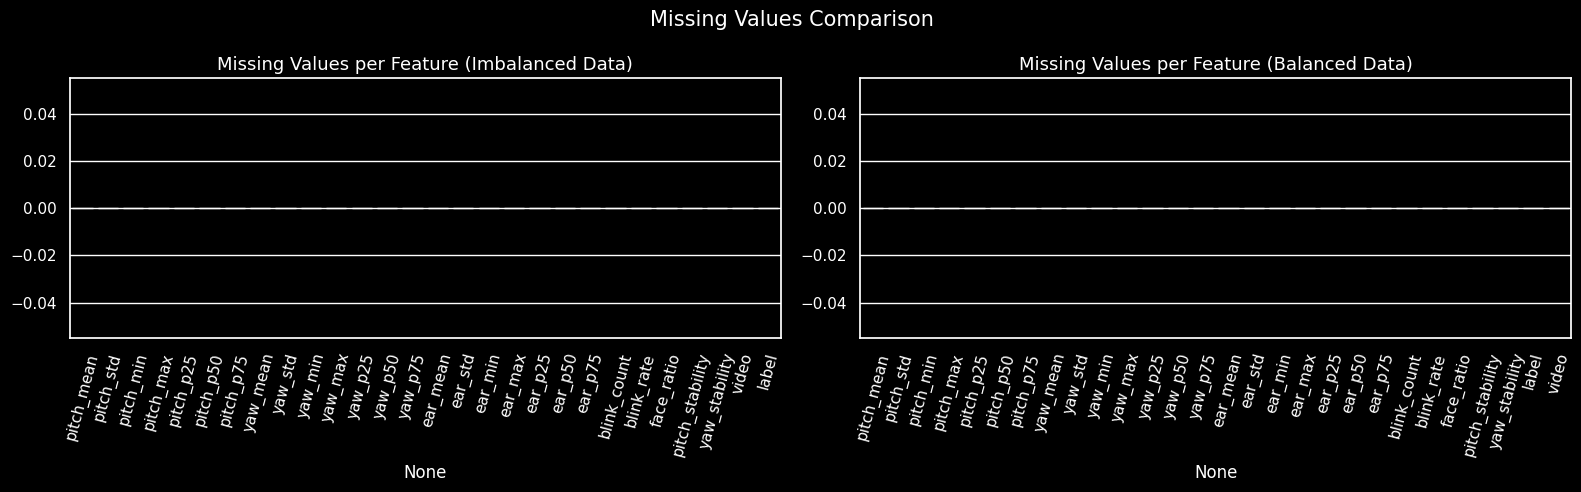

In [82]:
missing_imbalanced = imbalanced_train_data.isnull().sum().sort_values(ascending=False)
missing_balanced = balanced_train_data.isnull().sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(x=missing_imbalanced.index, y=missing_imbalanced.values, ax=axes[0])
axes[0].set_title("Missing Values per Feature (Imbalanced Data)", fontsize=13)
axes[0].tick_params(axis='x', rotation=75)

sns.barplot(x=missing_balanced.index, y=missing_balanced.values, ax=axes[1])
axes[1].set_title("Missing Values per Feature (Balanced Data)", fontsize=13)
axes[1].tick_params(axis='x', rotation=75)

plt.suptitle("Missing Values Comparison", fontsize=15)
plt.tight_layout()
plt.show()

As we see , there is no Null values in dataset 

#### Duplicates

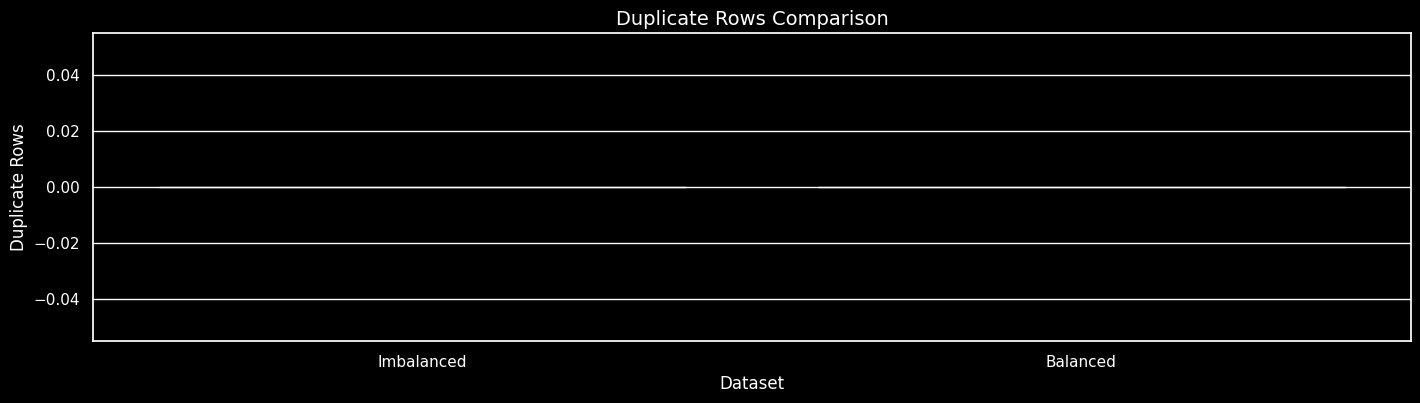

In [ ]:
dup_imbalanced = imbalanced_train_data.duplicated().sum()
dup_balanced = balanced_train_data.duplicated().sum()

dup_df = pd.DataFrame({
    "Dataset": ["Imbalanced", "Balanced"],
    "Duplicate Rows": [dup_imbalanced, dup_balanced]
})

plt.figure(figsize=(17, 4))
sns.barplot(data=dup_df, x="Dataset", y="Duplicate Rows", palette="mako")
plt.title("Duplicate Rows Comparison", fontsize=14)
plt.show()

As we see , there is no Duplicated in dataset 

## Distribution Of Target

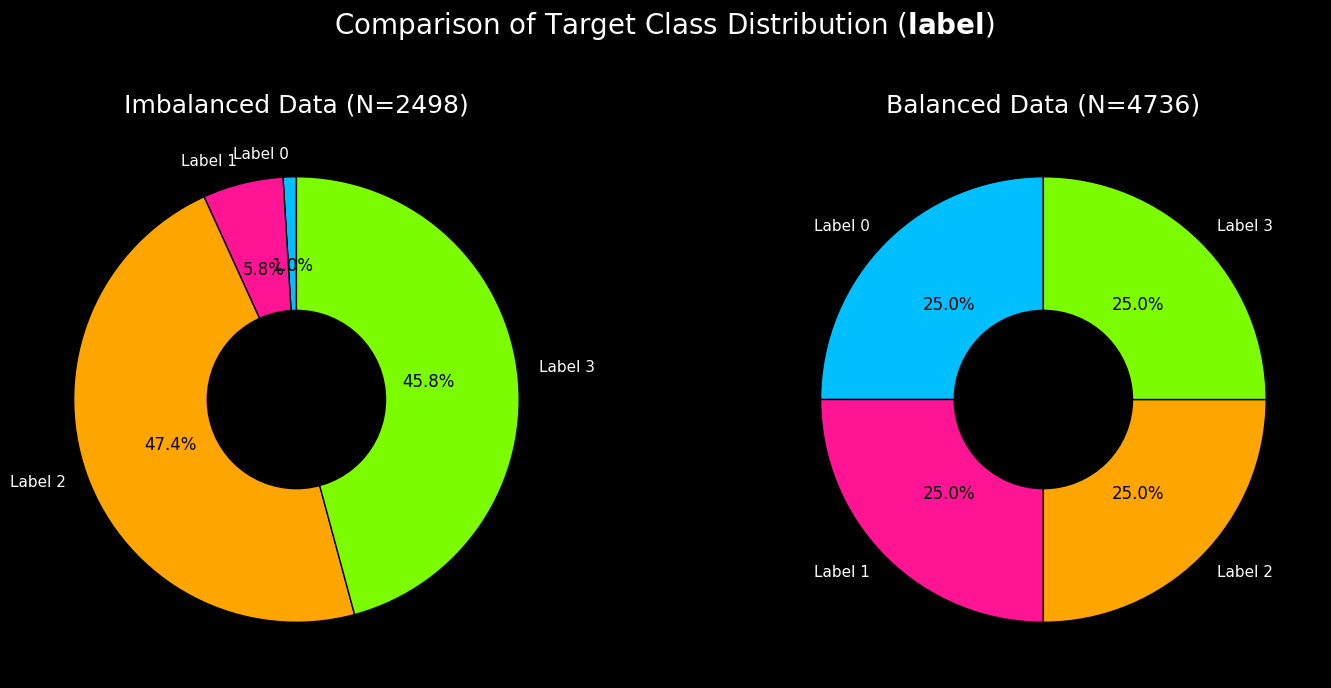

In [ ]:
def plot_donut_chart(data, title, ax):
    label_counts = data['label'].value_counts().sort_index()
    colors = sns.color_palette(DARK_PALETTE, n_colors=len(label_counts))

    _, texts, autotexts = ax.pie(
        label_counts,
        labels=[f'Label {l}' for l in label_counts.index],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.7, edgecolor='k') 
    )

   
    for text in texts:  # Styling text for dark mode
        text.set_color('white')
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)

    ax.set_title(title, fontsize=18)
    # Draw a circle at the center to make it a donut chart
    centre_circle = plt.Circle((0,0), 0.4, fc='k', edgecolor='k')
    ax.add_artist(centre_circle)


fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Comparison of Target Class Distribution ($\mathbf{label}$)', fontsize=20, color='white')

# Imbalanced Data
plot_donut_chart(imbalanced_train_data, f'Imbalanced Data (N={len(imbalanced_train_data)})', axes[0])

# Balanced Data
plot_donut_chart(balanced_train_data, f'Balanced Data (N={len(balanced_train_data)})', axes[1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

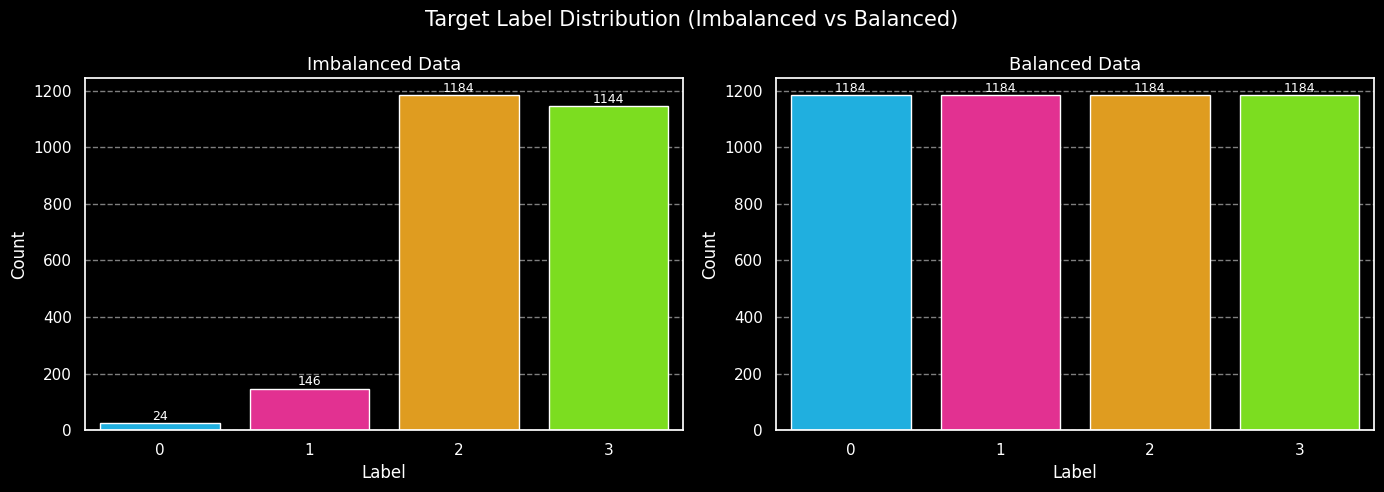

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Imbalanced
ax_imb = sns.countplot(x='label', data=imbalanced_train_data, ax=axes[0], palette=DARK_PALETTE)
axes[0].set_title("Imbalanced Data", fontsize=13)
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")

for p in ax_imb.patches:
    ax_imb.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='white',
                    xytext=(0, 5), textcoords='offset points')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Balanced
ax_bal = sns.countplot(x='label', data=balanced_train_data, ax=axes[1], palette=DARK_PALETTE)
axes[1].set_title("Balanced Data", fontsize=13)
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Count")

for p in ax_bal.patches:
    ax_bal.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='white',
                    xytext=(0, 5), textcoords='offset points')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle("Target Label Distribution (Imbalanced vs Balanced)", fontsize=15)
plt.tight_layout()
plt.show()

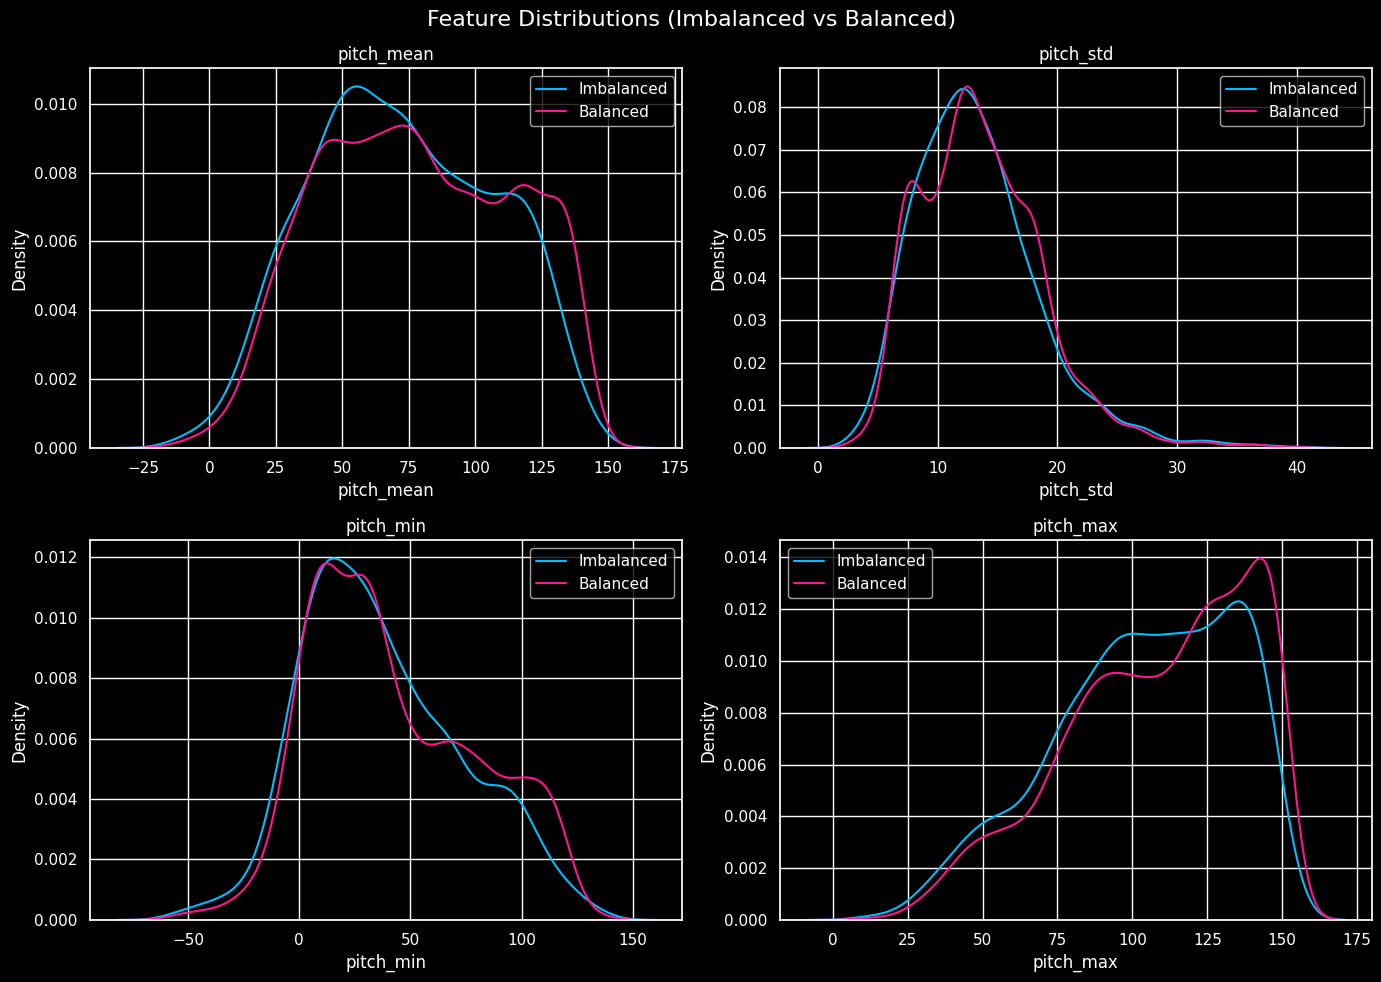

In [ ]:
numeric_cols = imbalanced_train_data.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Feature Distributions (Imbalanced vs Balanced)", fontsize=16)

for i, col in enumerate(numeric_cols[:4]):  # limit to first 4 numeric columns for clarity
    sns.kdeplot(imbalanced_train_data[col], label='Imbalanced', ax=axes[i//2][i%2])
    sns.kdeplot(balanced_train_data[col], label='Balanced', ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title(col)
    axes[i//2][i%2].legend()

plt.tight_layout()
plt.show()

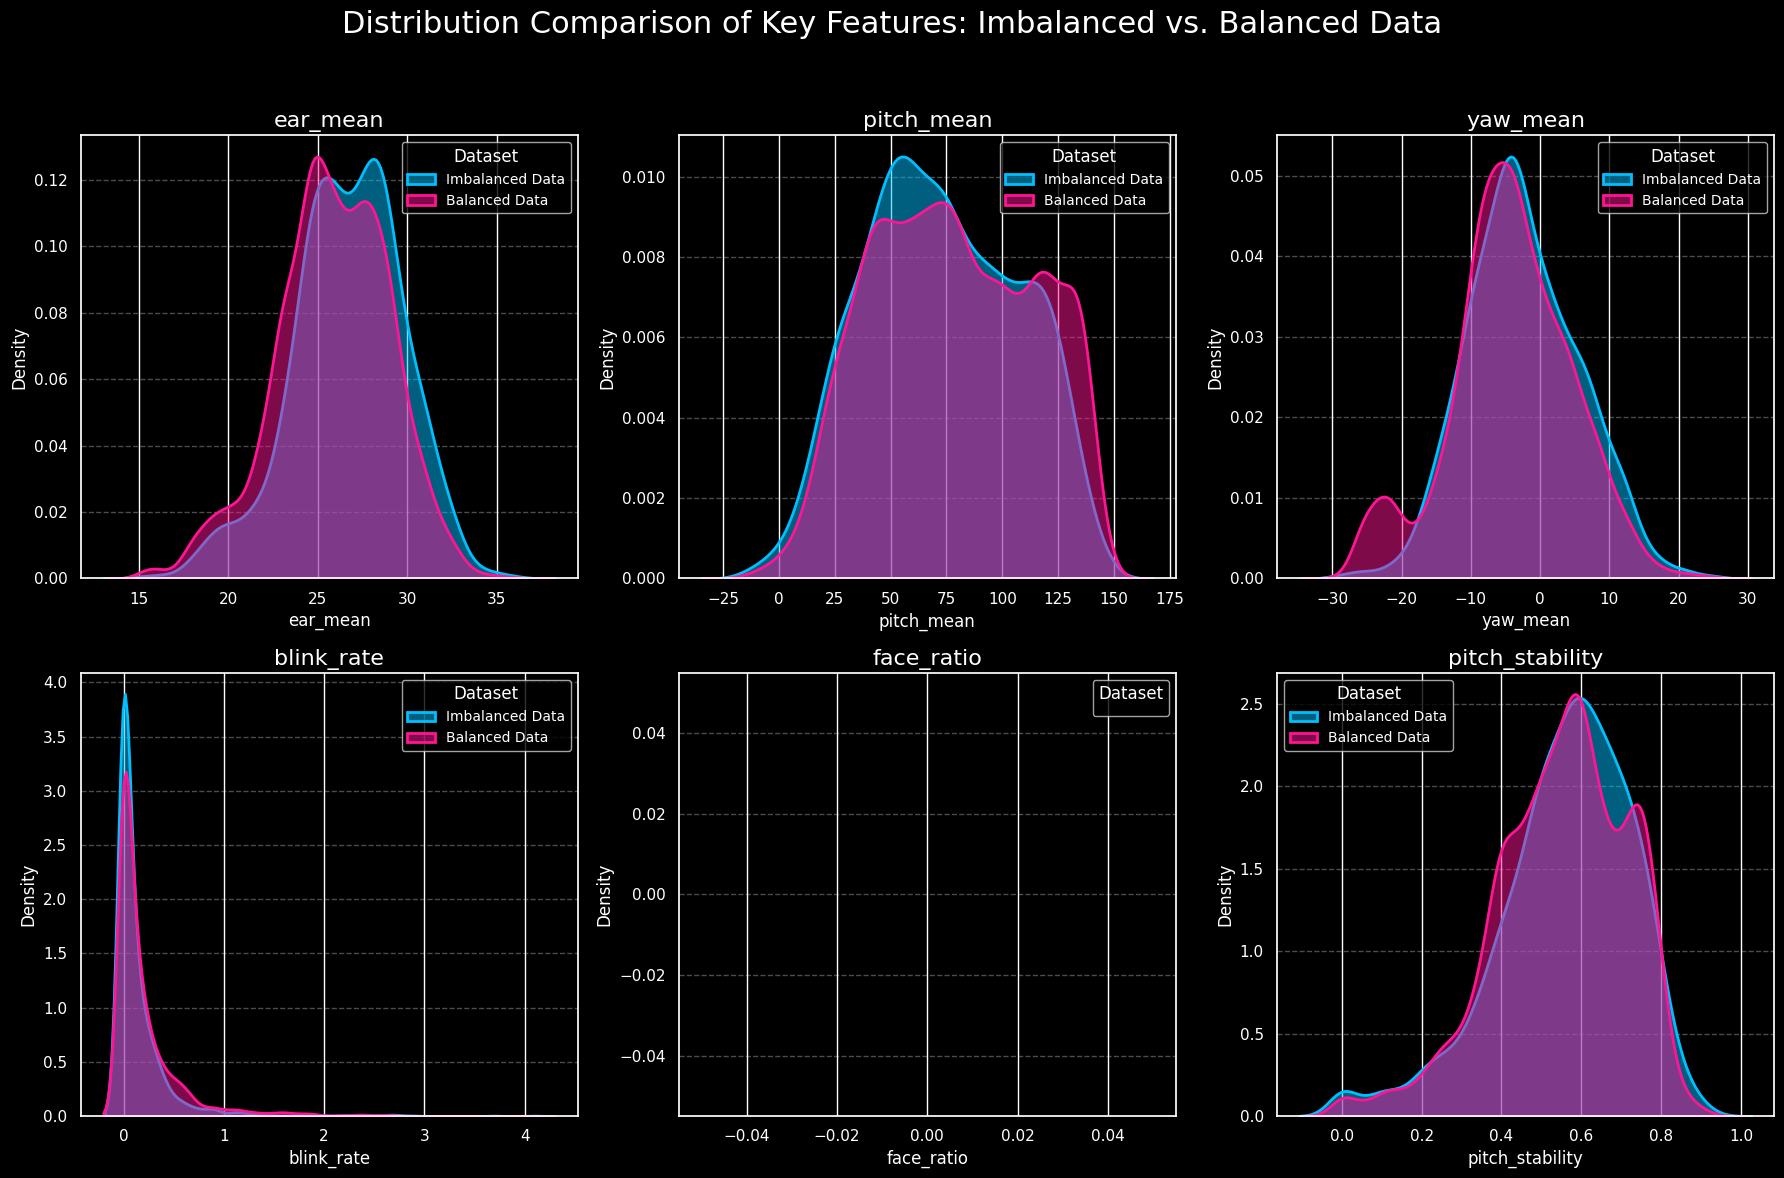

In [ ]:
KEY_FEATURES = [
    'ear_mean', 'pitch_mean', 'yaw_mean',
    'blink_rate', 'face_ratio', 'pitch_stability'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution Comparison of Key Features: Imbalanced vs. Balanced Data', fontsize=22, color='white')

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(KEY_FEATURES):
    ax = axes[i]
    
    sns.kdeplot(imbalanced_train_data[feature], fill=True,  alpha=0.5, linewidth=2, label='Imbalanced Data', ax=ax)
   
    sns.kdeplot(balanced_train_data[feature], fill=True, alpha=0.5, linewidth=2, label='Balanced Data', ax=ax)

    ax.set_title(feature, fontsize=16)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.legend(fontsize=10, title='Dataset') 

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

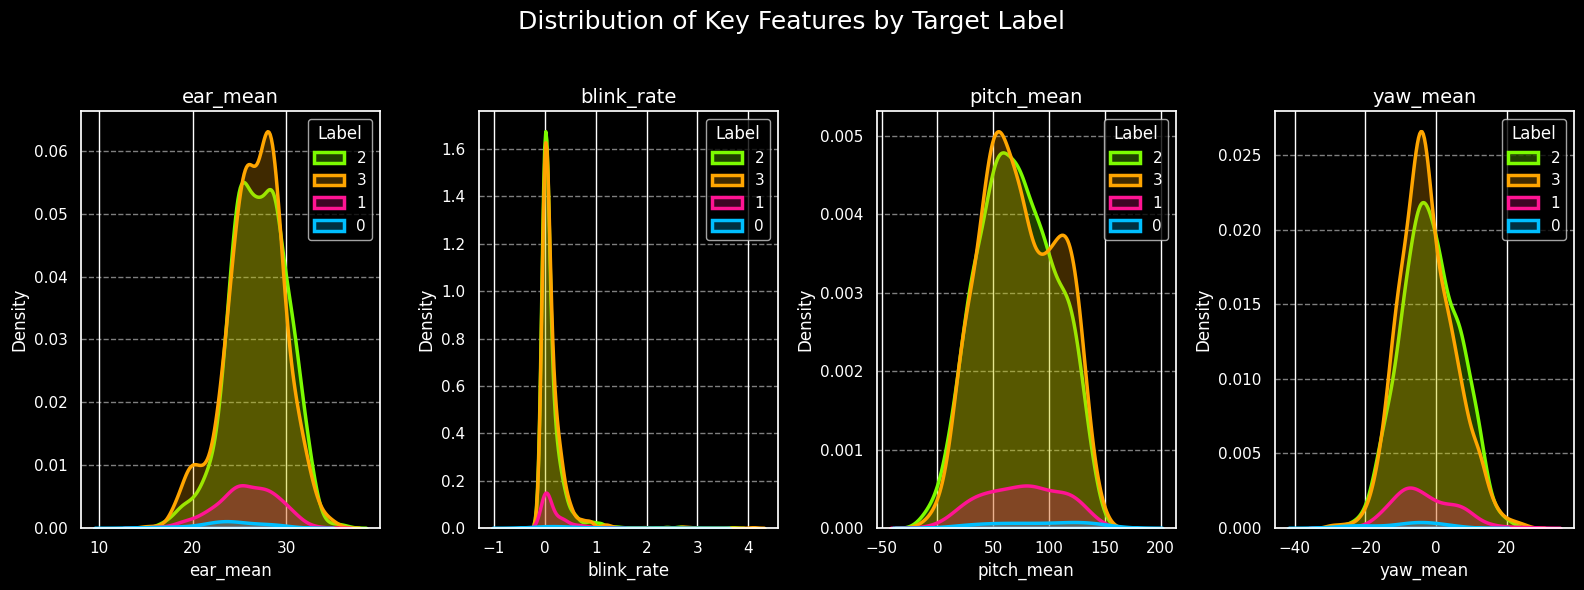

In [86]:
KEY_FEATURES = ['ear_mean', 'blink_rate','pitch_mean', 'yaw_mean']

fig, axes = plt.subplots(1, len(KEY_FEATURES), figsize=(4 * len(KEY_FEATURES), 6))
fig.suptitle('Distribution of Key Features by Target Label', fontsize=18)

for i, col in enumerate(KEY_FEATURES):
    sns.kdeplot(data=imbalanced_train_data, x=col, hue='label', fill=True, ax=axes[i], palette=DARK_PALETTE, linewidth=2.5)
    axes[i].set_title(col, fontsize=14)
    axes[i].legend(title='Label', labels=imbalanced_train_data['label'].unique(), loc='upper right')
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

--- Pair Plot of Critical Features ---


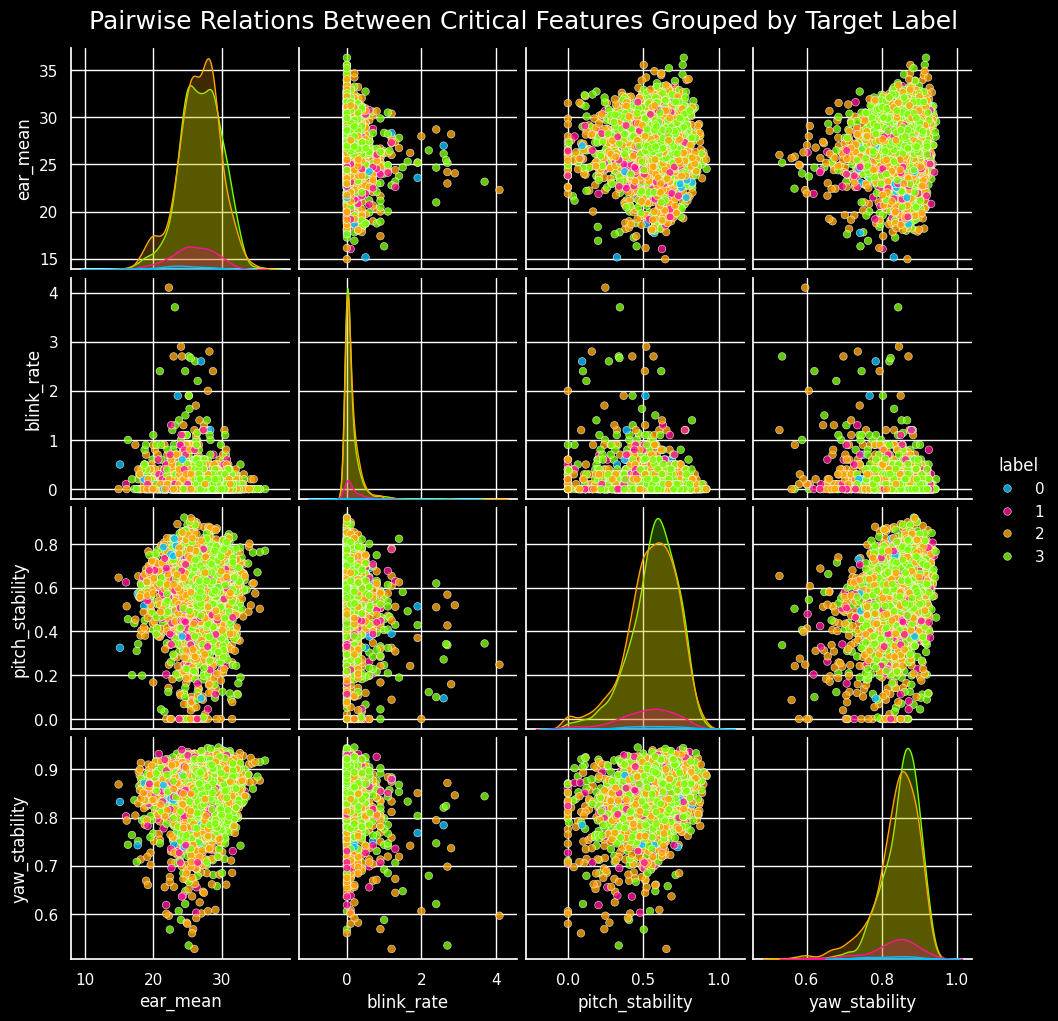

In [ ]:
# --- Pair Plot for Feature Relations ---
RELATION_FEATURES = ['ear_mean', 'blink_rate', 'pitch_stability', 'yaw_stability', 'label']

custom_colors = sns.color_palette(DARK_PALETTE, n_colors=len(imbalanced_train_data['label'].unique()))
sns.pairplot(imbalanced_train_data[RELATION_FEATURES], hue='label', palette=custom_colors, plot_kws={'alpha': 0.8, 's': 30})
plt.suptitle('Pairwise Relations Between Critical Features Grouped by Target Label', y=1.02, fontsize=18)
plt.show()